# EDA - 1

In [1]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")

In [2]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
# Q1. What is the range of selling prices in the dataset?

df['selling_price'].max() - df['selling_price'].min()


755000

In [4]:
# Q2. What is the median selling price for bikes in the dataset?

df['selling_price'].median()


45000.0

In [5]:
# Q3. What is the most common seller type?

df['seller_type'].value_counts().idxmax()


'Individual'

In [6]:
# Q4. How many bikes have driven more than 50,000 kilometers?

df[df['km_driven'] > 50000].shape[0]


170

In [7]:
# Q5. What is the average km_driven value for each ownership type?

df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [8]:
# Q6. What proportion of bikes are from the year 2015 or older?

(df[df['year'] <= 2015].shape[0]) / df.shape[0]


0.5664467483506126

In [9]:
# Q7. What is the trend of missing values across the dataset?

df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [10]:
# Q8. What is the highest ex_showroom_price recorded, and for which bike?

df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [11]:
# Q9. What is the total number of bikes listed by each seller type?

df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


<Axes: xlabel='km_driven', ylabel='selling_price'>

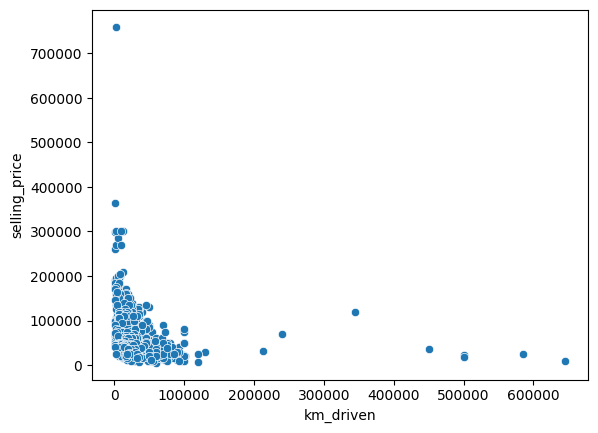

In [12]:
# Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

import seaborn as sns
sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')


In [14]:
# Q11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
df_filtered


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


<Axes: xlabel='year', ylabel='selling_price'>

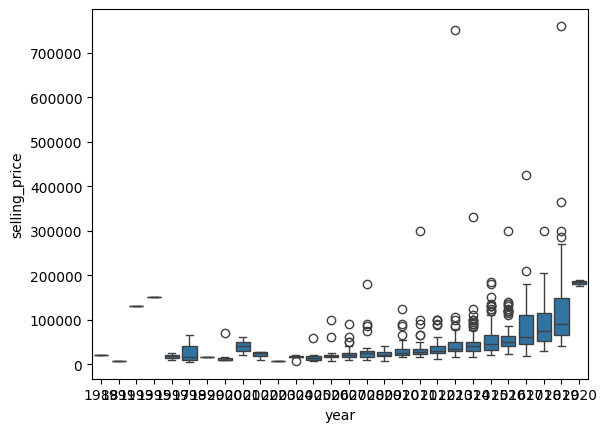

In [15]:
# Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

sns.boxplot(x='year', y='selling_price', data=df)


In [16]:
# Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

df['age'] = 2025 - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
df.groupby('age')['depreciation'].mean()


,depreciation
age,
5,-34260.000000
6,2954.562500
7,13023.194805
8,22306.082353
9,28328.190476
10,28013.275000
11,34505.606061
12,43086.886792
13,37317.648649


In [17]:
# Q14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_prices = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda x: x['selling_price'] > avg_prices.loc[x['year']], axis=1)
df[df['above_avg']][['name', 'year', 'selling_price']]


,name,year,selling_price
0,Royal Enfield Classic 350,2019,175000
2,Royal Enfield Classic Gunmetal Grey,2018,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,65000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
...,...,...,...
1004,Bajaj Pulsar NS 200,2016,60000
1005,TVS Apache RTR 160,2014,60000
1008,Bajaj Pulsar 220 F,2012,52000
1012,Bajaj Pulsar NS 200,2014,50000


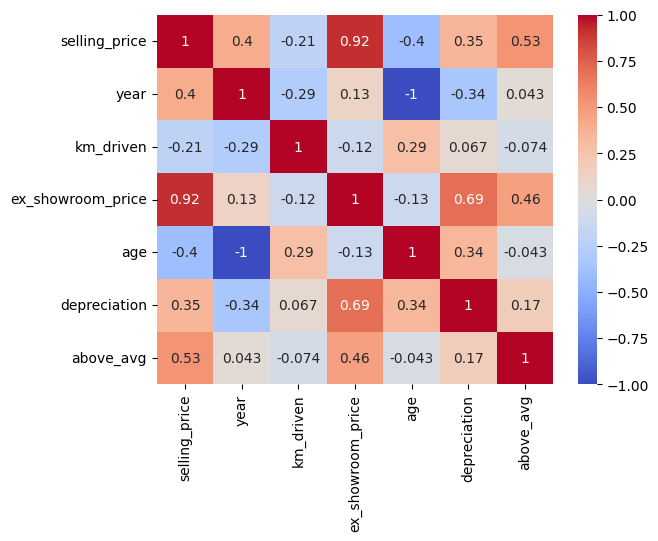

In [18]:
# Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


# EDA - 2

In [26]:
import pandas as pd
df = pd.read_csv("Car Sale.csv")

In [27]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

<Axes: title={'center': 'Average Selling Price per Dealer'}, xlabel='Dealer_Name'>

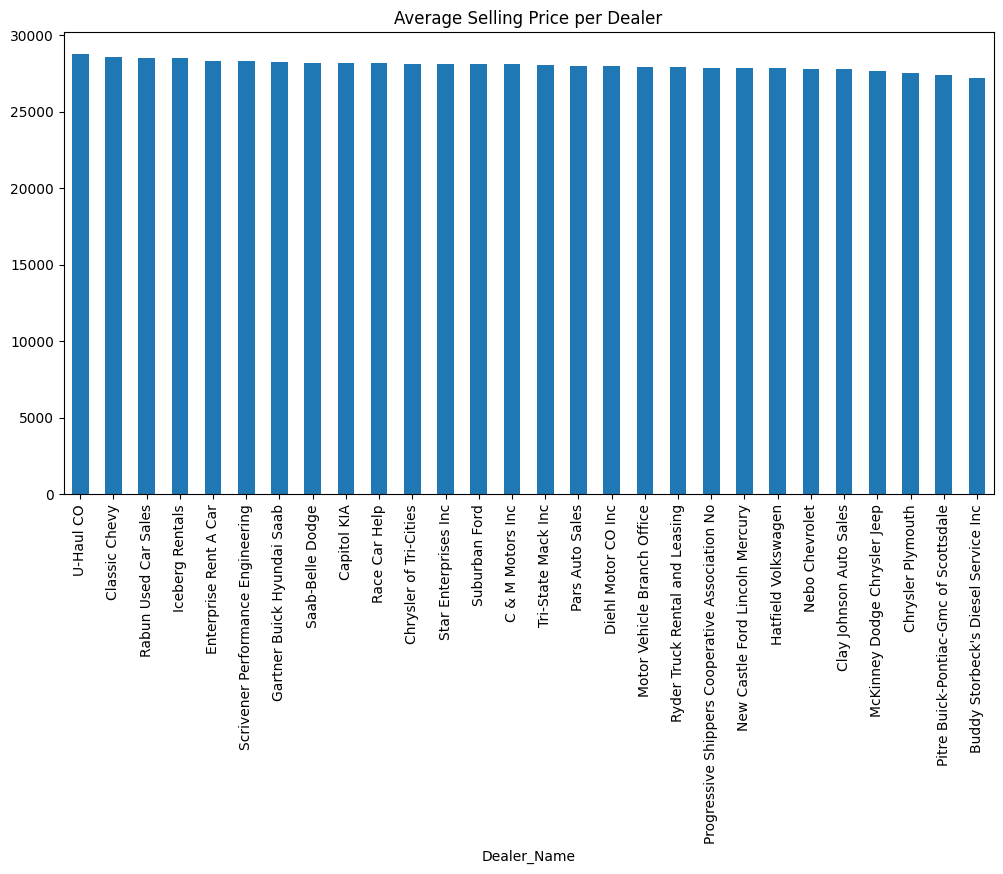

In [28]:
# Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_per_dealer)
avg_price_per_dealer.plot(kind='bar', figsize=(12,6), title='Average Selling Price per Dealer')


In [29]:
# Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation.head())


Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


<Axes: xlabel='Transmission', ylabel='Price ($)'>

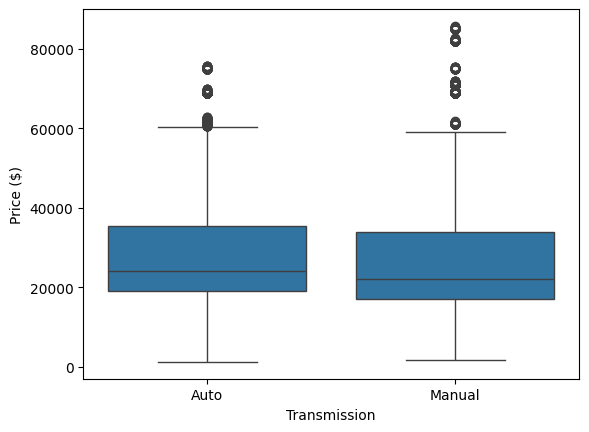

In [30]:
# Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

import seaborn as sns
sns.boxplot(x='Transmission', y='Price ($)', data=df)


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

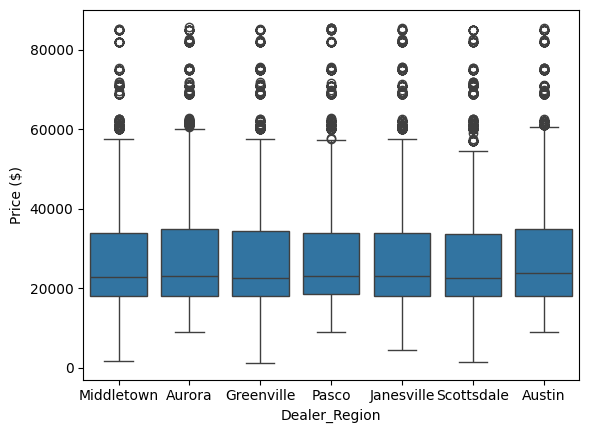

In [31]:
#  Q4. What is the distribution of car prices across different regions?

sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)


<Axes: title={'center': 'Distribution of Car Body Styles'}, xlabel='Body Style'>

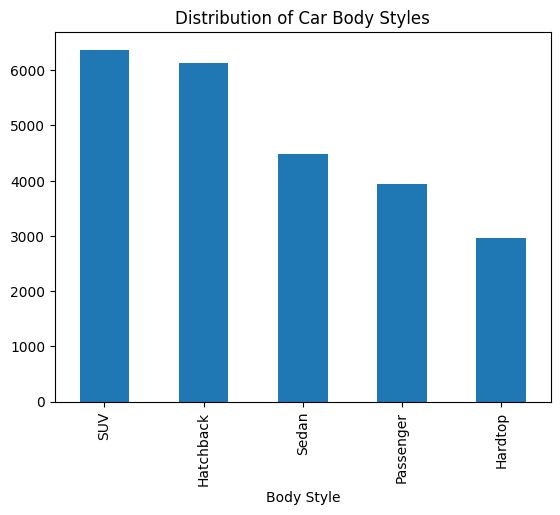

In [32]:
# Q5. What is the distribution of cars based on body styles?

df['Body Style'].value_counts().plot(kind='bar', title='Distribution of Car Body Styles')


In [33]:
# Q6. How does the average selling price of cars vary by customer gender and annual income?

df.groupby('Gender')[['Annual Income', 'Price ($)']].mean()


,Annual Income,Price ($)
Gender,,
Female,755973.021339,28277.265270
Male,851184.044207,28039.429407


<Axes: title={'center': 'Number of Cars Sold by Region'}, xlabel='Dealer_Region'>

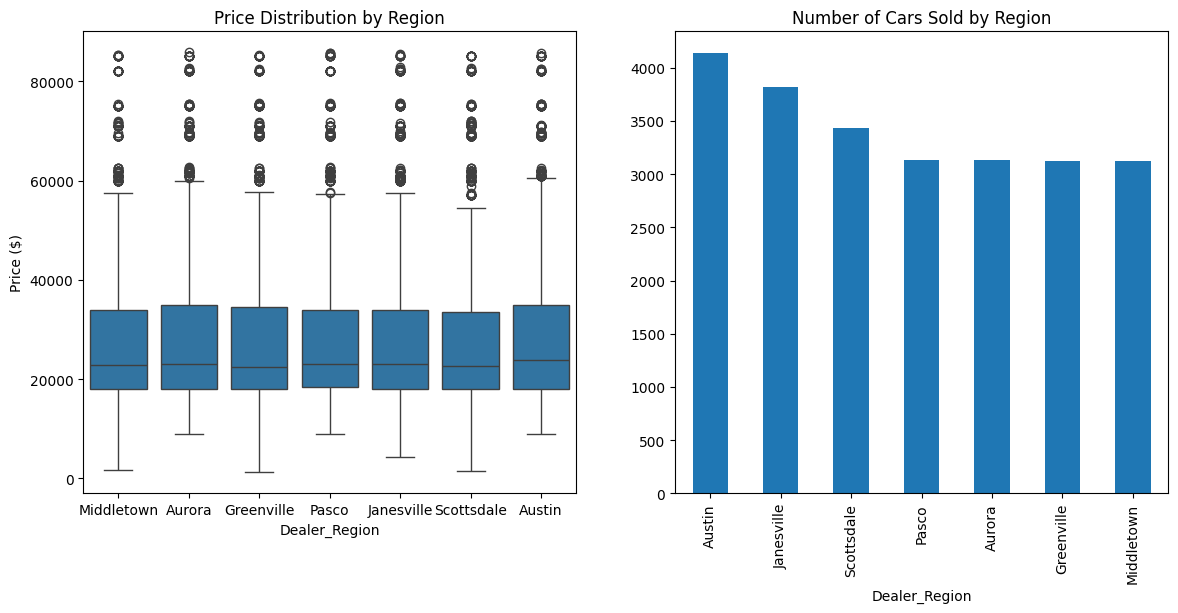

In [34]:
# Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')

plt.subplot(1,2,2)
df['Dealer_Region'].value_counts().plot(kind='bar', title='Number of Cars Sold by Region')


In [35]:
# Q8. How does the average car price differ between cars with different engine sizes?

df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [36]:
# Q9. How do car prices vary based on the customer’s annual income bracket?

# Creating income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, 200000], labels=['Low', 'Medium', 'High', 'Very High'])
df.groupby('Income Bracket')['Price ($)'].mean()


<ipython-input-36-f6d65c1f675f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income Bracket')['Price ($)'].mean()


,Price ($)
Income Bracket,
Low,27884.297820
Medium,NaN
High,43000.000000
Very High,22833.666667


<Axes: xlabel='Model', ylabel='Price ($)'>

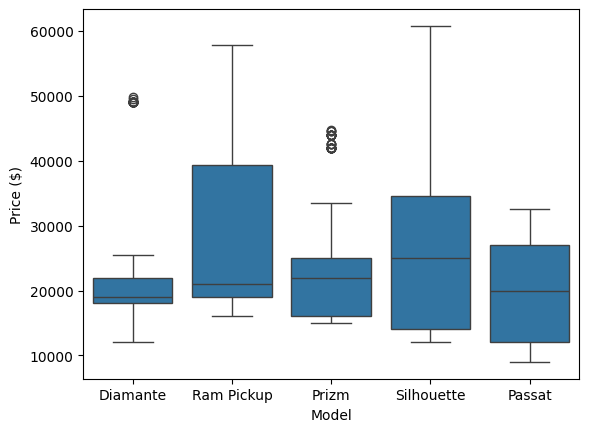

In [37]:
# Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_models = df['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])


Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


<Axes: xlabel='Engine', ylabel='Price ($)'>

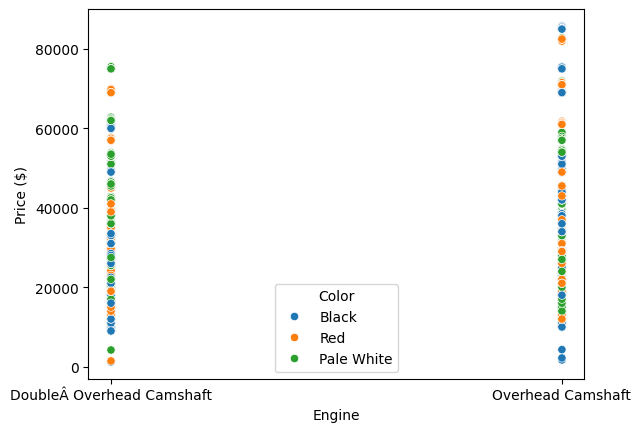

In [38]:
#  Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Price variation by color
color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_variation.head())

sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df)


<Axes: title={'center': 'Seasonal Car Sales by Month'}, xlabel='Month'>

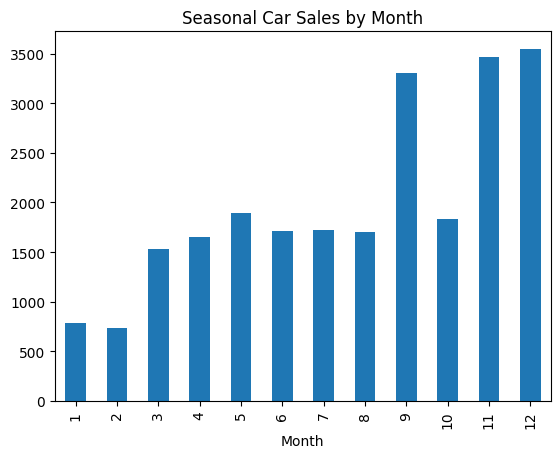

In [39]:
# Q12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month'].value_counts().sort_index().plot(kind='bar', title='Seasonal Car Sales by Month')


<Axes: xlabel='Body Style', ylabel='Price ($)'>

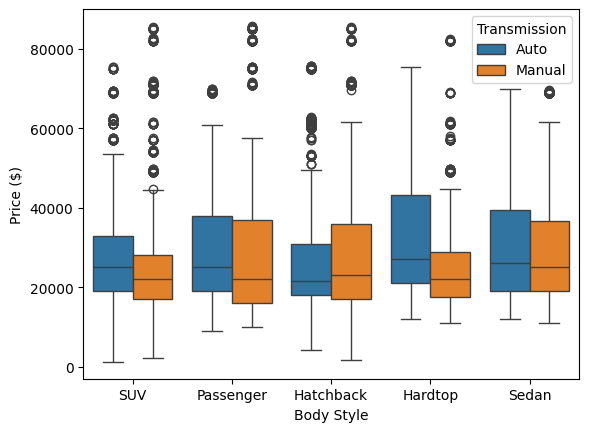

In [40]:
# Q13. How does the car price distribution change when considering different combinations of body style and transmission type?

sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)


<Axes: >

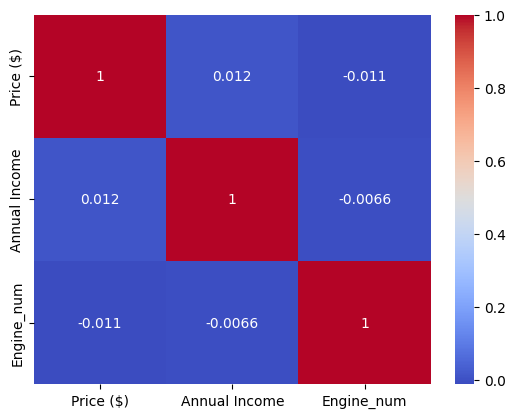

In [41]:
# Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

correlation = df[['Price ($)', 'Annual Income']].copy()
# Convert engine type to numeric representation for correlation
correlation['Engine_num'] = df['Engine'].astype('category').cat.codes

sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')


In [42]:
# Q15. How does the average car price vary across different car models and engine types?

df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False).head(10)


,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
LS400,Overhead Camshaft,53157.941558
GS400,Overhead Camshaft,53086.000000
Tacoma,DoubleÂ Overhead Camshaft,53085.821918
Aurora,Overhead Camshaft,51833.556962


# EDA - 3

In [54]:
import pandas as pd
df = pd.read_csv("amazon.csv")


In [44]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [55]:
# Q1. What is the average rating for each product category?

df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


In [56]:
# Q2. What are the top rating_count products by category?

df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


Text(0.5, 1.0, 'Distribution of Discounted vs Actual Prices')

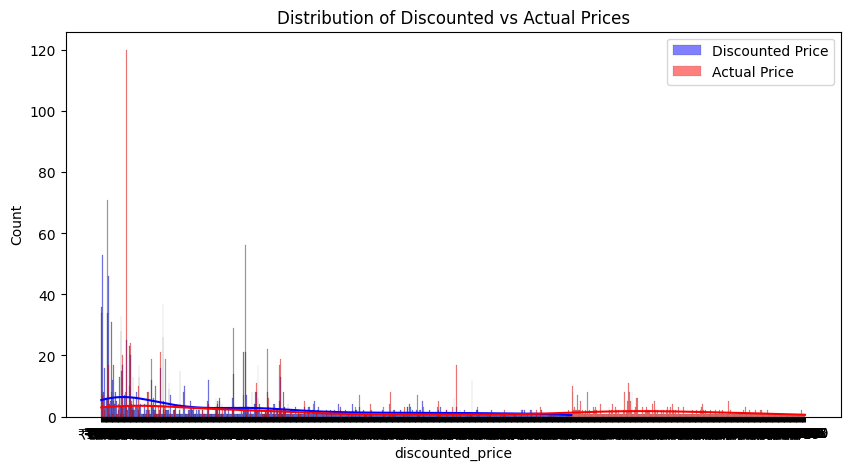

In [57]:
# Q3. What is the distribution of discounted prices vs. actual prices?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['discounted_price'], kde=True, color='blue', label='Discounted Price')
sns.histplot(df['actual_price'], kde=True, color='red', label='Actual Price')
plt.legend()
plt.title('Distribution of Discounted vs Actual Prices')


In [72]:
# Q4. How does the average discount percentage vary across categories?

df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)


,discount_percentage
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5
...,...
OfficeProducts|OfficeElectronics|Calculators|Financial&Business,0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper,0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens",0.0


In [74]:
# Q5. What are the most popular product names? (Based on number of ratings)

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)


,rating_count
product_name,
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",2445.0
"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",1948.0
"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",1806.0
"Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White",1312.0
"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Type C Devices – Red, 1 Meter",1151.0
"SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)",1072.0
"Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)",992.0
Eveready Red 1012 AAA Batteries - Pack of 10,989.0
"Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)",976.0


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

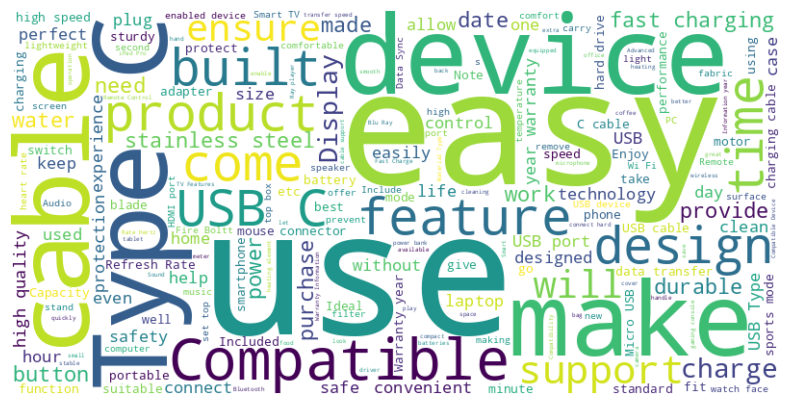

In [60]:
# Q6. What are the most popular product keywords?
# Assuming keywords are in about_product column:

from collections import Counter
from wordcloud import WordCloud

all_keywords = ' '.join(df['about_product'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [61]:
# Q7. What are the most popular product reviews?

df['review_content'].value_counts().head(10)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine.  Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use  Not sure in gamingCAMERA : good in this segment , can record  videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is  a bit less , but goodV RAM : you can add upto 2gb of virtual ram  but have to sacrifice your storage  Space to use it  OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [70]:
# Q8. What is the correlation between discounted_price and rating?

df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df[['discounted_price', 'rating']].corr()

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [68]:
# Q9. What are the Top 5 categories based on the highest ratings?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5) # Call the mean() function to get the result before sorting.
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Q10. Identify any potential areas for improvement or optimization based on the data analysis.

 - Some possible insights:

  - Categories with low ratings but high prices may need quality improvements.

  - Products with low rating counts could benefit from better marketing or visibility.

  - A significant gap between actual and discounted prices may indicate inflated MSRP values.

  - Some categories might show high discount but low conversion (indicated by rating_count), hinting at trust issues.

# EDA - 4

In [2]:
import pandas as pd
df = pd.read_csv("spotify.csv")

In [3]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
# Q1. Read the dataframe, check null values if present, then do the needful. Check duplicate rows, if present, then do the needful.

# Check and handle null values
print(df.isnull().sum())
df = df.dropna()  # or fillna() depending on context

# Check and remove duplicate rows
df = df.drop_duplicates()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


Text(0, 0.5, 'Count')

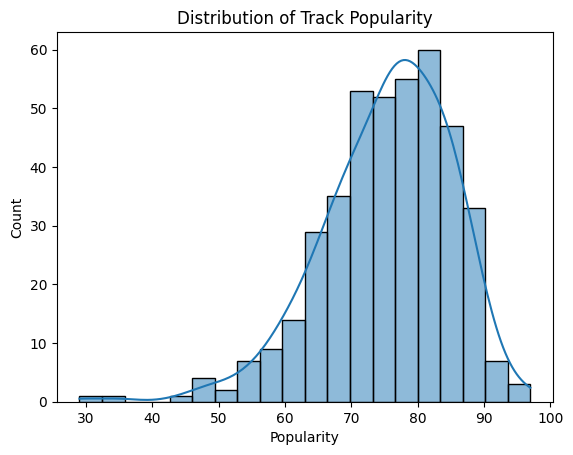

In [5]:
# Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')


Text(0.5, 1.0, 'Popularity vs Duration of Tracks')

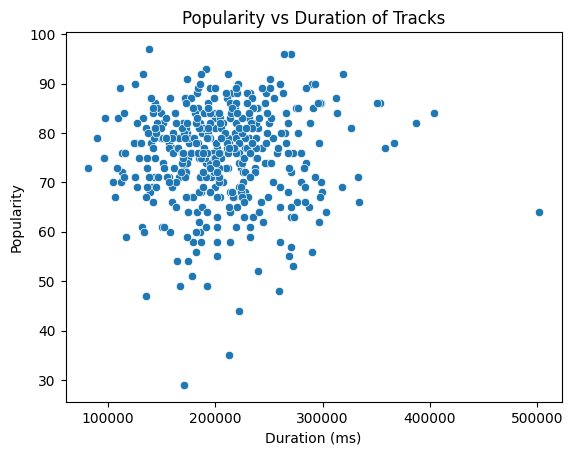

In [6]:
# Q3. Is there any relationship between popularity and duration of tracks? Use a scatter plot.

sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Popularity vs Duration of Tracks')


Text(0.5, 1.0, 'Top 10 Artists by Number of Tracks')

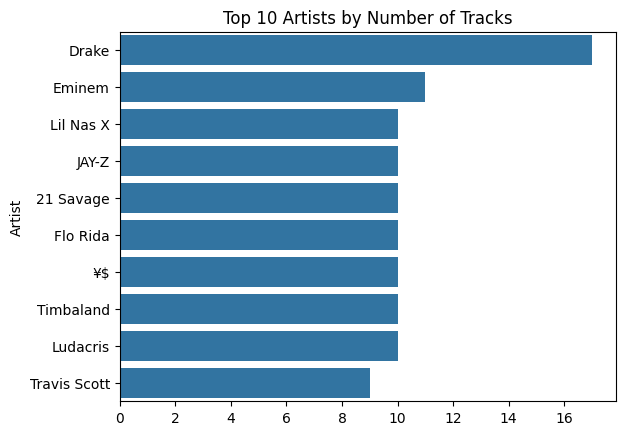

In [7]:
# Q4. Which artist has the highest number of tracks in the dataset? Display count of tracks for each artist using a countplot.

top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Number of Tracks')


In [8]:
# Q5. What are the top 5 least popular tracks in the dataset? Provide artist name and track name for each.

df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [9]:
# Q6. Among the top 5 most popular artists, which artist has the highest average popularity?

top_5_artists = df['Artist'].value_counts().head(5).index
df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)


,Popularity
Artist,
21 Savage,83.800000
Eminem,83.636364
Drake,82.882353
JAY-Z,77.900000
Lil Nas X,75.900000


In [10]:
# Q7. For the top 5 most popular artists, what are their most popular tracks?

df[df['Artist'].isin(top_5_artists)].sort_values(by='Popularity', ascending=False).groupby('Artist').first()[['Track Name', 'Popularity']]


,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
JAY-Z,Ni**as In Paris,86
Lil Nas X,THATS WHAT I WANT,81


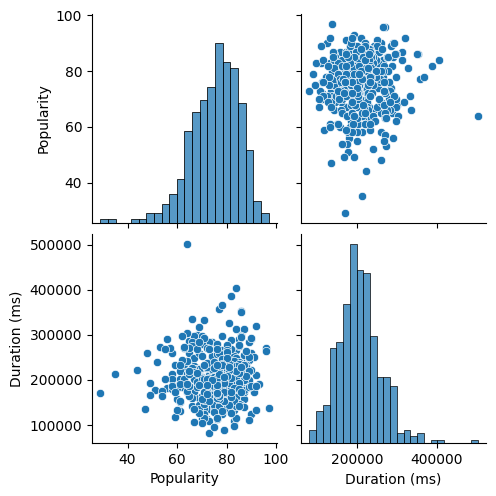

In [11]:
# Q8. Visualize relationships between multiple numerical variables using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Travis Scott'),
  Text(2, 0, '21 Savage'),
  Text(3, 0, 'Lil Nas X'),
  Text(4, 0, 'Eminem'),
  Text(5, 0, 'JAY-Z'),
  Text(6, 0, '¥$'),
  Text(7, 0, 'Flo Rida'),
  Text(8, 0, 'Ludacris'),
  Text(9, 0, 'Timbaland')])

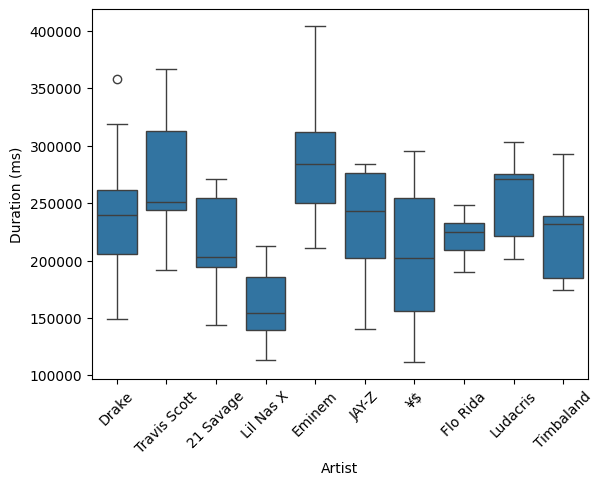

In [12]:
# Q9. Does the duration of tracks vary significantly across different artists? Use a box plot or violin plot.

top_10_artists = df['Artist'].value_counts().head(10).index
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_10_artists)])
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Travis Scott'),
  Text(2, 0, '21 Savage'),
  Text(3, 0, 'Lil Nas X'),
  Text(4, 0, 'Eminem'),
  Text(5, 0, 'JAY-Z'),
  Text(6, 0, '¥$'),
  Text(7, 0, 'Flo Rida'),
  Text(8, 0, 'Ludacris'),
  Text(9, 0, 'Timbaland')])

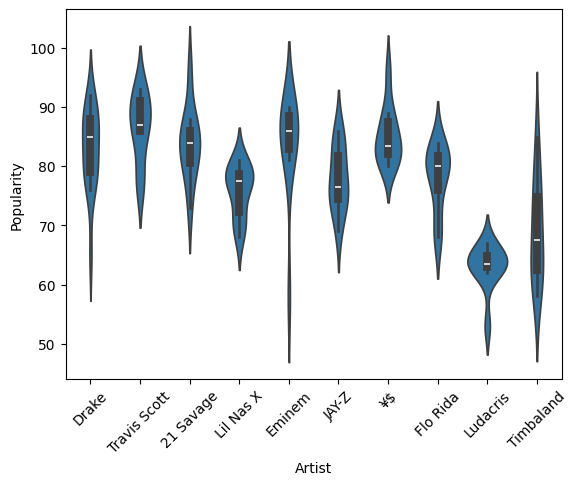

In [13]:
# Q10. How does the distribution of track popularity vary for different artists? Visualize using a swarm plot or violin plot.

sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_10_artists)])
plt.xticks(rotation=45)
